In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/clean/training_dataset.csv') 
df2 = pd.read_csv('../data/clean/waiting_times_interpolated.csv')


In [3]:
df_meta = pd.read_csv('../data/overview data/metadata.csv', sep = ';', usecols=['DATE', 'DAYOFWEEK', 'DAYOFYEAR', 'WEEKOFYEAR', 'MONTHOFYEAR', 'YEAR', 'SEASON'])

In [4]:
df_meta.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON
0,1/01/2015,5,0,0,1,2015,CHRISTMAS PEAK
1,1/02/2015,6,1,0,1,2015,CHRISTMAS
2,1/03/2015,7,2,0,1,2015,CHRISTMAS
3,1/04/2015,1,3,1,1,2015,CHRISTMAS
4,1/05/2015,2,4,1,1,2015,CHRISTMAS


In [5]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         2079 non-null   object
 1   DAYOFWEEK    2079 non-null   int64 
 2   DAYOFYEAR    2079 non-null   int64 
 3   WEEKOFYEAR   2079 non-null   int64 
 4   MONTHOFYEAR  2079 non-null   int64 
 5   YEAR         2079 non-null   int64 
 6   SEASON       1826 non-null   object
dtypes: int64(5), object(2)
memory usage: 113.8+ KB


In [6]:
df.head()

,date,attraction,minute,actual_over_posted
0,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,7_dwarfs_train,630,0.611111


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751616 entries, 0 to 1751615
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   attraction          object 
 2   minute              int64  
 3   actual_over_posted  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.5+ MB


In [8]:
df2.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN,SPOSTMIN_interp,actual_over_posted
0,0,2015-01-01,7_dwarfs_train,0,NaN,NaN,NaN,NaN
1,1,2015-01-01,7_dwarfs_train,30,NaN,NaN,NaN,NaN
2,2,2015-01-01,7_dwarfs_train,60,NaN,NaN,NaN,NaN
3,3,2015-01-01,7_dwarfs_train,90,NaN,NaN,NaN,NaN
4,4,2015-01-01,7_dwarfs_train,120,NaN,NaN,NaN,NaN


In [9]:
# Convert DATE column in df1 to datetime objects
df_meta['DATE'] = pd.to_datetime(df_meta['DATE'], format='%m/%d/%Y') #day/month/year format



In [10]:
df_meta.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK
1,2015-01-02,6,1,0,1,2015,CHRISTMAS
2,2015-01-03,7,2,0,1,2015,CHRISTMAS
3,2015-01-04,1,3,1,1,2015,CHRISTMAS
4,2015-01-05,2,4,1,1,2015,CHRISTMAS


In [11]:
# Convert date column in df2 to datetime objects
df['date'] = pd.to_datetime(df['date']) #default format is year-month-day



In [12]:
df.head()

,date,attraction,minute,actual_over_posted
0,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,7_dwarfs_train,630,0.611111


In [13]:
# Merge the DataFrames on the standardized date columns
merged_df = pd.merge(df_meta, df, left_on='DATE', right_on='date', how='inner')

In [14]:
merged_df.tail()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,date,attraction,minute,actual_over_posted
1495878,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1500,3.0
1495879,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1530,3.0
1495880,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1560,3.0
1495881,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1590,3.0
1495882,2021-08-31,3,242,35,8,2021,NaN,2021-08-31,winnie_the_pooh,1620,3.0


In [15]:
merged_df.to_csv('../data/clean/training_merged_metadata.csv', encoding='utf-8')

In [16]:
merged_df.isna().sum()

DATE                       0
DAYOFWEEK                  0
DAYOFYEAR                  0
WEEKOFYEAR                 0
MONTHOFYEAR                0
YEAR                       0
SEASON                221556
date                       0
attraction                 0
minute                     0
actual_over_posted         0
dtype: int64

In [17]:
merged_clean = merged_df.dropna()

In [18]:
merged_clean.isna().sum()

DATE                  0
DAYOFWEEK             0
DAYOFYEAR             0
WEEKOFYEAR            0
MONTHOFYEAR           0
YEAR                  0
SEASON                0
date                  0
attraction            0
minute                0
actual_over_posted    0
dtype: int64

In [19]:
merged_clean.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,date,minute,actual_over_posted
count,1274327,1.274327e+06,1.274327e+06,1.274327e+06,1.274327e+06,1.274327e+06,1274327,1.274327e+06,1.274327e+06
mean,2017-07-28 11:24:52.455547648,4.022555e+00,1.844707e+02,2.645060e+01,6.602648e+00,2.017067e+03,2017-07-28 11:24:52.455547648,1.137968e+03,inf
min,2015-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.015000e+03,2015-01-01 00:00:00,1.800000e+02,0.000000e+00
25%,2016-04-17 00:00:00,2.000000e+00,9.300000e+01,1.300000e+01,4.000000e+00,2.016000e+03,2016-04-17 00:00:00,9.000000e+02,4.166667e-01
50%,2017-08-23 00:00:00,4.000000e+00,1.840000e+02,2.600000e+01,7.000000e+00,2.017000e+03,2017-08-23 00:00:00,1.170000e+03,7.272727e-01
75%,2018-11-03 00:00:00,6.000000e+00,2.770000e+02,4.000000e+01,1.000000e+01,2.018000e+03,2018-11-03 00:00:00,1.410000e+03,1.307692e+00
max,2019-12-31 00:00:00,7.000000e+00,3.650000e+02,5.300000e+01,1.200000e+01,2.019000e+03,2019-12-31 00:00:00,1.620000e+03,inf
std,NaN,2.025156e+00,1.057318e+02,1.511544e+01,3.456873e+00,1.426881e+00,NaN,3.031438e+02,NaN


<Axes: >

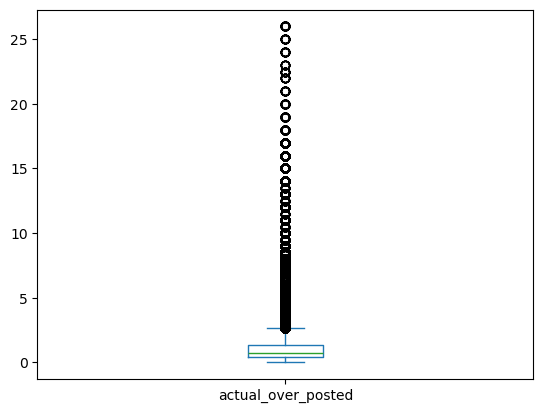

In [21]:
merged_clean['actual_over_posted'].plot(kind='box')

In [23]:
merged_clean_copy = merged_clean.copy()

In [24]:
merged_clean_copy['actual_over_posted'].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\isabe\AppData\Local\Temp\ipykernel_24440\1238378795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_clean_copy['actual_over_posted'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [25]:
merged_clean_copy.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,date,attraction,minute,actual_over_posted
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,630,0.611111


In [26]:
merged_clean_copy.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,date,minute,actual_over_posted
count,1274327,1.274327e+06,1.274327e+06,1.274327e+06,1.274327e+06,1.274327e+06,1274327,1.274327e+06,1.268301e+06
mean,2017-07-28 11:24:52.455547648,4.022555e+00,1.844707e+02,2.645060e+01,6.602648e+00,2.017067e+03,2017-07-28 11:24:52.455547648,1.137968e+03,1.186268e+00
min,2015-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.015000e+03,2015-01-01 00:00:00,1.800000e+02,0.000000e+00
25%,2016-04-17 00:00:00,2.000000e+00,9.300000e+01,1.300000e+01,4.000000e+00,2.016000e+03,2016-04-17 00:00:00,9.000000e+02,4.000000e-01
50%,2017-08-23 00:00:00,4.000000e+00,1.840000e+02,2.600000e+01,7.000000e+00,2.017000e+03,2017-08-23 00:00:00,1.170000e+03,7.187500e-01
75%,2018-11-03 00:00:00,6.000000e+00,2.770000e+02,4.000000e+01,1.000000e+01,2.018000e+03,2018-11-03 00:00:00,1.410000e+03,1.250000e+00
max,2019-12-31 00:00:00,7.000000e+00,3.650000e+02,5.300000e+01,1.200000e+01,2.019000e+03,2019-12-31 00:00:00,1.620000e+03,2.600000e+01
std,NaN,2.025156e+00,1.057318e+02,1.511544e+01,3.456873e+00,1.426881e+00,NaN,3.031438e+02,1.520887e+00


<Axes: >

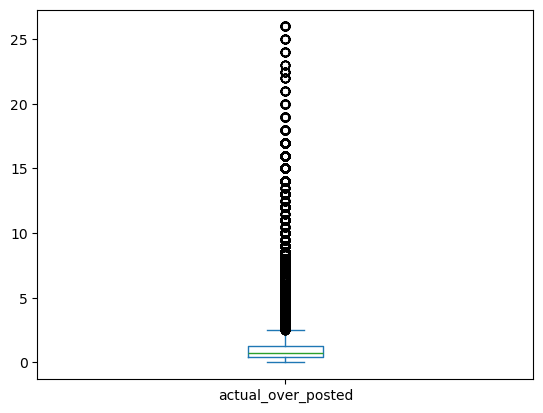

In [27]:
merged_clean_copy['actual_over_posted'].plot(kind='box')

In [28]:
df_7dwarfs = merged_clean_copy[merged_clean_copy['attraction'] == '7_dwarfs_train']

In [29]:
df_7dwarfs.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,date,attraction,minute,actual_over_posted
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,630,0.611111


In [30]:
df_7dwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49240 entries, 0 to 1273752
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                49240 non-null  datetime64[ns]
 1   DAYOFWEEK           49240 non-null  int64         
 2   DAYOFYEAR           49240 non-null  int64         
 3   WEEKOFYEAR          49240 non-null  int64         
 4   MONTHOFYEAR         49240 non-null  int64         
 5   YEAR                49240 non-null  int64         
 6   SEASON              49240 non-null  object        
 7   date                49240 non-null  datetime64[ns]
 8   attraction          49240 non-null  object        
 9   minute              49240 non-null  int64         
 10  actual_over_posted  49240 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 4.5+ MB


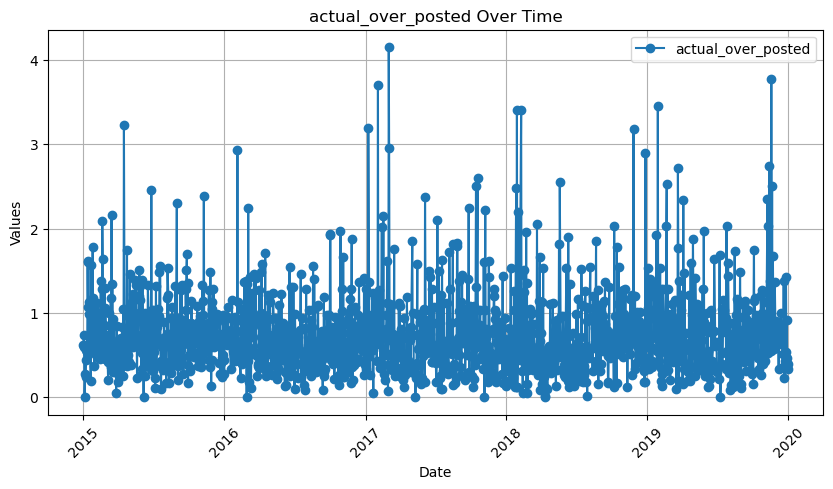

In [31]:

# Group by date and aggregate (e.g., mean, sum, etc.)
grouped_df = df_7dwarfs.groupby('DATE')[['actual_over_posted']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['actual_over_posted'], label='actual_over_posted', marker='o')


# Formatting
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('actual_over_posted Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()

in dropping the NaN, I have a sneaky feeling 2020 was already dropped...

In [32]:
df_7dwarfs_no_covid = df_7dwarfs[df_7dwarfs['DATE'].dt.year != 2020]

In [33]:
df_7dwarfs_no_covid.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,date,attraction,minute,actual_over_posted
0,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,5,0,0,1,2015,CHRISTMAS PEAK,2015-01-01,7_dwarfs_train,630,0.611111


In [34]:
df_7dwarfs_no_covid.describe()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,date,minute,actual_over_posted
count,49240,49240.000000,49240.000000,49240.000000,49240.000000,49240.000000,49240,49240.000000,49240.000000
mean,2017-06-10 03:20:56.344435456,4.108245,185.214622,26.557271,6.627214,2016.932474,2017-06-10 03:20:56.344435456,1115.421202,0.726117
min,2015-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,2015.000000,2015-01-01 00:00:00,240.000000,0.000000
25%,2016-02-28 00:00:00,2.000000,92.000000,13.000000,4.000000,2016.000000,2016-02-28 00:00:00,840.000000,0.333333
50%,2017-06-02 00:00:00,4.000000,186.000000,27.000000,7.000000,2017.000000,2017-06-02 00:00:00,1140.000000,0.583333
75%,2018-09-18 00:00:00,6.000000,279.000000,40.000000,10.000000,2018.000000,2018-09-18 00:00:00,1410.000000,0.875000
max,2019-12-31 00:00:00,7.000000,365.000000,53.000000,12.000000,2019.000000,2019-12-31 00:00:00,1620.000000,12.000000
std,NaN,2.017768,107.090324,15.313244,3.498681,1.428946,NaN,320.535163,0.676054


In [37]:
df_7dwarfs_no_covid['SEASON'].unique()

array(['CHRISTMAS PEAK', 'CHRISTMAS', 'WINTER',
       'MARTIN LUTHER KING JUNIOR DAY', 'PRESIDENTS WEEK', 'SPRING',
       'EASTER', 'MEMORIAL DAY', 'SUMMER BREAK', 'JULY 4TH',
       'SEPTEMBER LOW', 'FALL', 'COLUMBUS DAY', 'HALLOWEEN',
       'JERSEY WEEK', 'THANKSGIVING', 'MARDI GRAS'], dtype=object)

In [38]:
season_mapping = {
    'CHRISTMAS PEAK': 1, 'CHRISTMAS': 2, 'WINTER': 3,
    'MARTIN LUTHER KING JUNIOR DAY': 4, 'PRESIDENTS WEEK': 5, 'SPRING': 6,
    'EASTER': 7, 'MEMORIAL DAY': 8, 'SUMMER BREAK': 9, 'JULY 4TH': 10,
    'SEPTEMBER LOW': 11, 'FALL': 12, 'COLUMBUS DAY': 13, 'HALLOWEEN': 14,
    'JERSEY WEEK': 15, 'THANKSGIVING': 16, 'MARDI GRAS': 17
}

df_7dwarfs_no_covid['SEASON'] = df_7dwarfs_no_covid['SEASON'].replace(season_mapping)

C:\Users\isabe\AppData\Local\Temp\ipykernel_24440\2245611799.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_7dwarfs_no_covid['SEASON'] = df_7dwarfs_no_covid['SEASON'].replace(season_mapping)


In [39]:
df_7dwarfs_no_covid.head()

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,date,attraction,minute,actual_over_posted
0,2015-01-01,5,0,0,1,2015,1,2015-01-01,7_dwarfs_train,510,0.733333
1,2015-01-01,5,0,0,1,2015,1,2015-01-01,7_dwarfs_train,540,0.523810
2,2015-01-01,5,0,0,1,2015,1,2015-01-01,7_dwarfs_train,570,0.458333
3,2015-01-01,5,0,0,1,2015,1,2015-01-01,7_dwarfs_train,600,0.647059
4,2015-01-01,5,0,0,1,2015,1,2015-01-01,7_dwarfs_train,630,0.611111


In [45]:

X = df_7dwarfs_no_covid.drop(columns=['actual_over_posted', 'attraction', 'date', 'DATE'])  # Features
y = df_7dwarfs_no_covid['actual_over_posted']  # Target variable (numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [46]:
X


,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,minute
0,5,0,0,1,2015,1,510
1,5,0,0,1,2015,1,540
2,5,0,0,1,2015,1,570
3,5,0,0,1,2015,1,600
4,5,0,0,1,2015,1,630
...,...,...,...,...,...,...,...
1273748,3,364,52,12,2019,1,1500
1273749,3,364,52,12,2019,1,1530
1273750,3,364,52,12,2019,1,1560
1273751,3,364,52,12,2019,1,1590


In [47]:
model = RandomForestRegressor(n_estimators=50, max_samples=0.5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=0.5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 0.2034
RMSE: 0.3412


mean is 0.72, met sdtev 0.65.

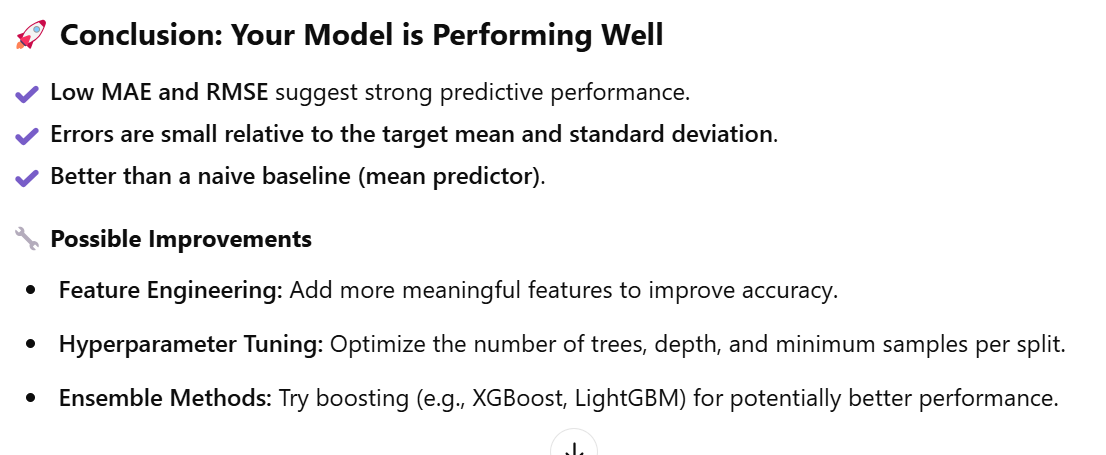

In [49]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model2.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [50]:
y_pred = model2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 0.1505
RMSE: 0.2674


In [51]:
model3 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [52]:
y_pred = model3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 0.1494
RMSE: 0.2653


Conclusie: het verschil tussen 100 of 200 random trees is klein. Heeft geen zin om het bos nog groter te maken.

2de conclusie: in vergelijking met de random forest zonder season: die zonder season scoren nog beter!